# Modelo de Agrupamento ou CLusterização

#### Aqui vamos usar um modelo de clusterização para seprar os clientes de uma mercearia com base em suas preferencias e assim consguiromos indicar outros produtos para os clientes com base em pessoas que em o gosto parecido, vemos modelos desse tipo no Spotify e no Noetflix

### Primeiro vamos chamar as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scikitplot.metrics import plot_silhouette

Vamos chamar os arquivo

In [2]:
df = pd.read_csv('Wholesale customers data.csv')

Vamos explorar os arquivos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Não existem dados nulos

Vamos ver como estão compotas as varivaies

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Agora vamos tirar as variaveis que não importam para o agrupamento

In [5]:
df = df.drop(columns=["Channel", "Region"])

Vamos verificar se existem outliers para podermos trata-los

<AxesSubplot:>

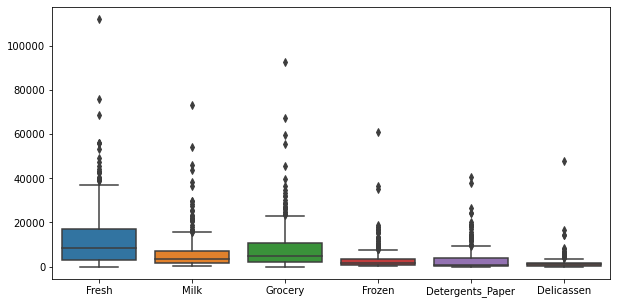

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

Vamos utilizar o metodo iqr para retirar os outliers

In [7]:
for column in df.columns:
    q1, q3 = df[column].quantile([.25,.75])
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    print(f"{column}: {ub}")
    df.loc[~df[column].between(0,ub), column] = np.nan

Fresh: 37642.75
Milk: 15676.125
Grocery: 23409.875
Frozen: 7772.25
Detergents_Paper: 9419.875
Delicassen: 3938.25


Vamos verificar como ficou a diferença entre os outliers

In [8]:
print(df.shape)
df = df.dropna().reset_index(drop=True)
print(df.shape)

(440, 6)
(332, 6)


Vamos ver em um novo boxsplot como estão nossos dados agora

<AxesSubplot:>

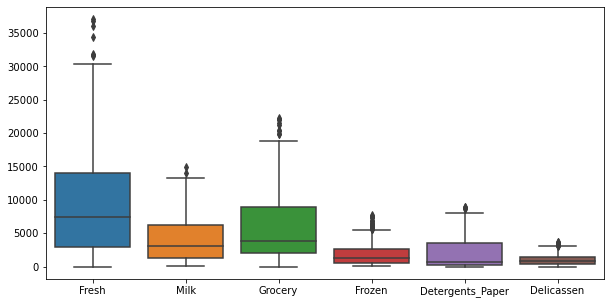

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

Vamos ajustar colocar os dados na mesma escala para evitarmos problemas futuros

In [10]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

In [12]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

Agora poderemos treinar o modelo no metodo Kmeans e verificar como está o agrupamento dos dados.

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_df)
cluster_label = kmeans.predict(scaled_df)

In [14]:
df["labels"] = cluster_label

In [15]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=12345)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
    print(f"n_clusters= {i}, inertia={kmeans.inertia_}")

n_clusters= 1, inertia=106.01527060932193
n_clusters= 2, inertia=67.09808146741061
n_clusters= 3, inertia=55.9412726476762
n_clusters= 4, inertia=47.702201809510115
n_clusters= 5, inertia=42.55308065009081
n_clusters= 6, inertia=38.43520097599881
n_clusters= 7, inertia=35.64186101507802
n_clusters= 8, inertia=33.611571218109376
n_clusters= 9, inertia=32.0031038156629
n_clusters= 10, inertia=30.63531847710199


<AxesSubplot:>

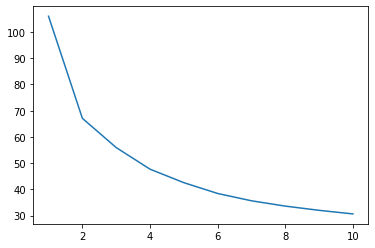

In [16]:
#hide
sns.lineplot(y=inertias, x=range(1,11))

In [17]:
#hide
inertias_pct = [w/inertias[0] for w in inertias]

<AxesSubplot:>

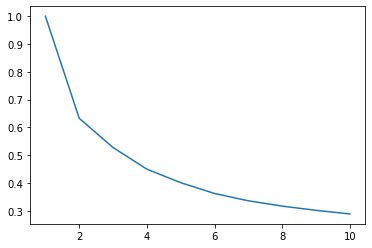

In [18]:
#hide
sns.lineplot(y=inertias_pct, x=range(1,11))

Vamos seprar os clientes entre 4 agrupamentos, já que e quando chega no 4 a curva começa a ter uma inercia
logo mais de 4 grupos não terão tanta mudança nas variaveis como os 4 primeiros

In [19]:
kmeans = KMeans(n_clusters=4, random_state=12345)
kmeans.fit(scaled_df)
df["labels"] = kmeans.predict(scaled_df)

In [30]:
#hide
df.groupby("labels").count()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
0,66,66,66,66,66,66
1,44,44,44,44,44,44
2,113,113,113,113,113,113
3,40,40,40,40,40,40
4,69,69,69,69,69,69


Agora veremos em grafico como os grupos se conportam

<AxesSubplot:xlabel='labels'>

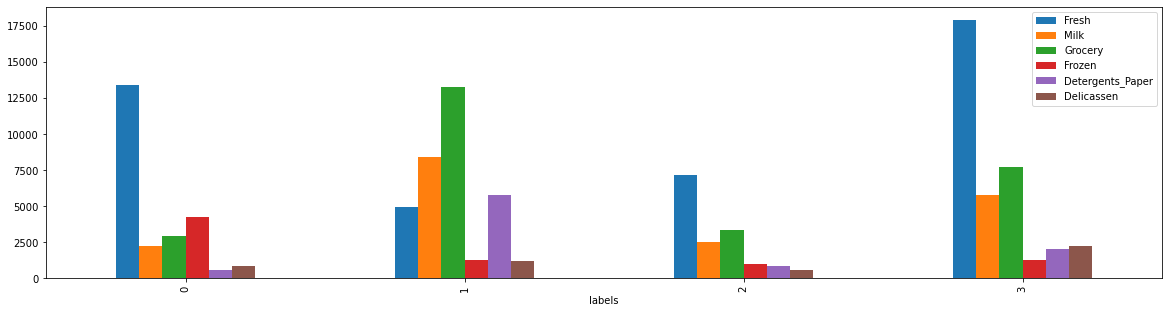

In [22]:
df.groupby("labels").mean().plot(kind="bar", figsize=(20,5))

agora veremos com 5 grupos

# Conclusão

Modelos de agrupamento ou clusterização servem para separarmos os grupos pelas suas preferencias ou habitos, vemos no dia a dia modelos parecidos trabalhado por trás de paltaformas como Spotify e Netflix nos recomendando conteudos com base no que outras pessoas que tem os mesmos gostos que nós procuram buscando trazer uma melhor experiencia na paltaforma